# HW1: Practice with Python, hard-margin SVM, and linear regression

## Kara Conrad, 9082326472

Hello Students:

- Start by downloading HW1.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- I've included the output from my solution in HW1.html so you can check your
  work. Your output should match or be close to mine. Use 3 significant
  figures for floats. e.g. We can print 3 figures for 𝜋/1000 as
  print(f'{np.pi/1000:.3}'). The pattern is print(f'{x:.precision}'),
  where x is the value to print and precision is the number of figures.
- If you have questions, please ask them in class or office hours. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- Please clean up your code:
  - Comment out unnecessary code that is useful for orienting you, like printing the data set.
  - Label your output, like writing 'weight=20.1' or 'The weight is 20.1' rather than just '20.1'.
  - Simplify your code if you can.
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW01.ipynb to Canvas's HW01.ipynb assignment
  - HW01.html to Canvas's HW01.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2a, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, linear_model

# 1. Use a hard-margin SVM
 to classify cars as having automatic or manual transmissions.
- Read [http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv](http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv) into a DataFrame. (This is the mtcars data frame from R with two of its rows removed to get linearly separable data.)
  (I used df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv', index_col=0).)
- Make an X from the wt (weight in 1000s of pounds) and mpg (miles per gallon) columns. Make y from the am column (where 0=automatic
  or 1=manual transmission).
- Train an SVM using kernel='linear' and C=1000. Print its coefficients and intercept.
- Report the training accuracy. (It's given by clf.score(X, y).)
- Predict the transmission for a car weighing 4000 pounds (wt=4) that gets 20 mpg.
- Use five plt.plot() calls to make a figure with wt on its x-axis and mpg on its y-axis including:
  - the automatic transmission cars in red
  - the manual transmission cars in blue
  - the decision boundary (the center line of the road)
  - the lower margin boundary (the left side of the road)
  - the upper margin boundary (the right side of the road)
  - a reasonable title, axis labels, and legend

/Users/karaconrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karaconrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Coefficients for wt & mpg respectively:[[-8.24431115 -0.30922192]]. The intercept:[32.01974189]
The training accuracy:1.0
The predicted transmission for a car of 4k lbs and 20 mpg is 0 (automatic)


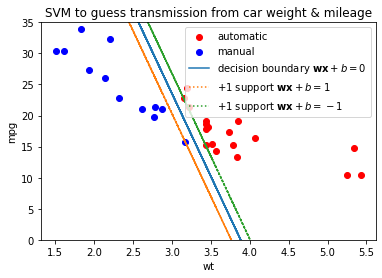

In [59]:
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv', index_col=0)

X = df[['wt', 'mpg']]
Y = df[['am']]

clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, Y)
print(f'Coefficients for wt & mpg respectively:{clf.coef_}. The intercept:{clf.intercept_}')

print(f'The training accuracy:{ clf.score(X, Y) }')

clf.predict([[4, 20]])
print("The predicted transmission for a car of 4k lbs and 20 mpg is 0 (automatic)")

plt.scatter(X.wt[Y.am==0], X.mpg[Y.am==0], color='red', label='automatic')
plt.scatter(X.wt[Y.am==1], X.mpg[Y.am==1], color='blue', label='manual')
x2_y = -(clf.coef_[0][0]* X.wt + clf.intercept_) / clf.coef_[0][1]
plt.plot(X.wt, x2_y, label=r'decision boundary $\mathbf{wx} + b = 0$')
plt.plot(X.wt,x2_y +1/clf.coef_[0][1], linestyle='dotted', label=r'+1 support $\mathbf{wx} + b =  1$' )
plt.plot(X.wt,x2_y -1/clf.coef_[0][1], linestyle='dotted', label=r'+1 support $\mathbf{wx} + b =  -1$' )
plt.legend()
plt.xlabel('wt')
plt.ylabel('mpg')
plt.title('SVM to guess transmission from car weight & mileage')
plt.ylim([0, 35])
plt.show()

# 2. Make three linear regression models.


## 2a: Make a simple regression model by hand.
Use the matrix formula $w = (X^T X)^{-1} X^T y$ we developed in class to fit these three points:
(0, 5), (2, 1), (4, 3). (Use linear_model.linearRegression(), if you wish, to check your work.)

intercept=4.0, slope=-0.5


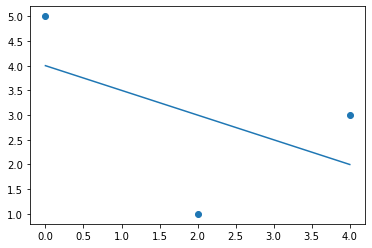

In [85]:
X = [[1,0], [1,2], [1,4]]
just_x=np.array([0,2,4])
y = [5, 1, 3]

XT_X = (np.array(X).T).dot(np.array(X))
w= (np.linalg.inv(XT_X)).dot(np.array(X).T).dot(y)

print(f'intercept={w[0]}, slope={w[1]}')

plt.scatter(just_x, y)
plt.plot(just_x, (w[1]*just_x + w[0]))

## 2b: Make a simple linear regression model from real data.
Estimate the average daily trading volume of a Dow Jones Industrial Average stock from its market capitalization. That is, use $y = $ AvgVol vs. $x =$ MarketCap.
- Read [http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv](http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv) into a DataFrame.
  (I used df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv', index_col='Symbol').)
- Find the model. Print its equation.
- Print its $R^2$ value (the proportion of variability in $y$ accounted for by $x$ via the linear model, given by model.score(X, y)).
- Make a plot of the data and model line.
- Use the model to predict the volume for a company with market capitalization of 0.25e12 (a quarter-trillion dollars); add this as a red point on your plot.
- Say what happens to Volume as Market Capitalization increases. (Use a Markdown cell.)

The equation is: Volume = [2.67584249e-05]*Market Capitalization + 3408894.873
The model's R^2 value is 0.705.


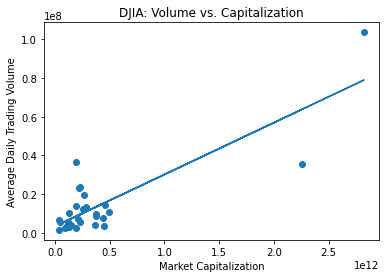

The model predicts a volume of 1.01e+07 with a Market Capitalization of 0.25e12.


/Users/karaconrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/karaconrad/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [131]:
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv', index_col=0)

X = df[['MarketCap']]
Y = df[['AvgVol']]
model = linear_model.LinearRegression()
model.fit(X, Y)
print(f'The equation is: Volume = {model.coef_[0]}*Market Capitalization + {np.round(model.intercept_[0],3)}')

print(f'The model\'s R^2 value is {np.round(model.score(X, Y),3)}.')

plt.scatter(X,Y)
plt.plot(X.MarketCap, model.coef_[0]*X.MarketCap + model.intercept_)
plt.title("DJIA: Volume vs. Capitalization")
plt.ylabel("Average Daily Trading Volume")
plt.xlabel("Market Capitalization")
plt.show()

pred = model.predict([["{:.9f}".format(0.25e12)]])
print(f'The model predicts a volume of {"{:.2e}".format(pred[0][0])} with a Market Capitalization of 0.25e12.') 

What happens to Volume as Market Capitalization increases is that the Volume also increases. Although the slope value is very small, there is a positive correlation between the 2 measurements.

## 2c Make a multiple regression model.
Estimate the same volume from both market capitalization and price. That is, use $y =$ AvgVol vs. $x_1 =$ MarketCap and $x_2 =$ Price.
- Find the model.
- Print its equation.
- Print its $R^2$ value.
- Say what happens to Volume as Market Capitalization increases and what happens to Volume as Price increases (while holding the other variable fixed). (Use a Markdown cell.)

In [130]:
X = df[['MarketCap', 'Price']]
y = df[['AvgVol']]
model = linear_model.LinearRegression()
model.fit(X, y)
print(f'The equation is: Volume = {model.coef_[0][0]}*Market Capitalization + {np.round(model.coef_[0][1],3)}*Price + {np.round(model.intercept_[0],3)}')

print(f'The model\'s R^2 value is {np.round(model.score(X, y),3)}.')

The equation is: Volume = 2.8930749430540465e-05*Market Capitalization + -66935.347*Price + 14425755.696
The model's R^2 value is 0.823.


What happens to Volume as Market Capitalization increases is that it will slowly affect the Volume by a positive increase. While as Price increases, there is a much more drastic effect on the Volume that is negative (makes the Volume decrease).